In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import cv2
import google.colab.patches as colab
import numpy as np
import matplotlib.pyplot as plt

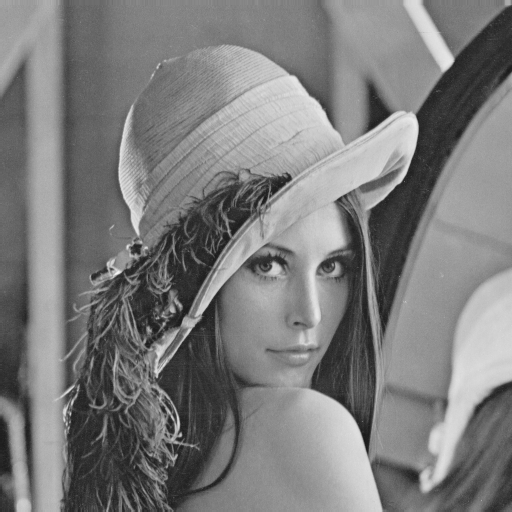

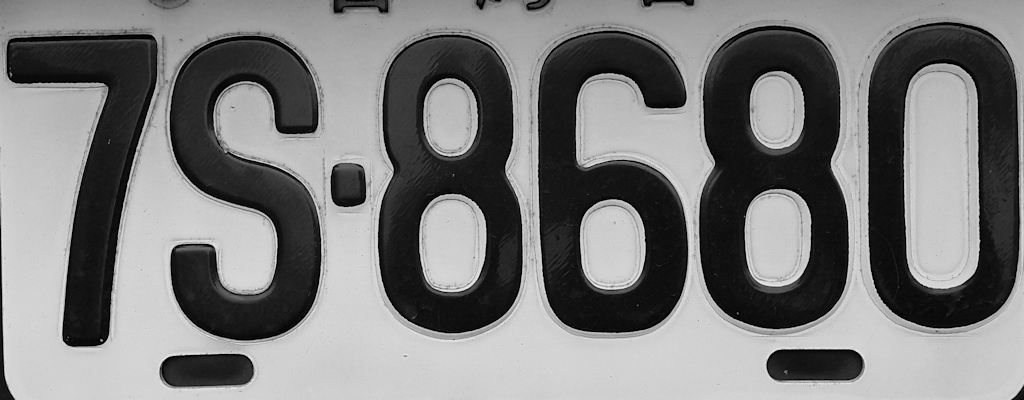

In [27]:
inImage =cv2.imread("/content/drive/MyDrive/lena.bmp",0)
tarImage =cv2.imread("/content/drive/MyDrive/license_plate.bmp",0)
 
colab.cv2_imshow(inImage)
colab.cv2_imshow(tarImage)

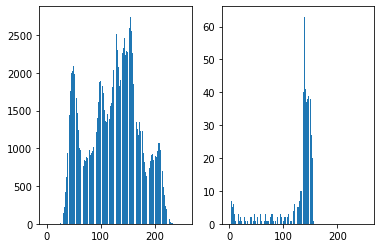

In [28]:
inHist = cv2.calcHist([inImage],[0],None,[256],[0,256])
inHist = inHist.reshape(256)
 
tarHist = cv2.calcHist(tarImage,[0],None,[256],[0,256])
tarHist = tarHist.reshape(256)
 
fig,ax =plt.subplots(1,2)
ax[0].bar(range(inHist.shape[0]),inHist)
ax[1].bar(range(tarHist.shape[0]),tarHist)
 
plt.show()

In [29]:
inHistogram =np.zeros((256), dtype =float)
 
for row in range(inImage.shape[0]):
  for col in range(inImage.shape[1]):
    gValue = inImage[row,col]
    inHistogram[gValue] =inHistogram[gValue] +1
  
for i in range(256):
  inHistogram[i] = inHistogram[i]/(inImage.shape[0] *inImage.shape[1])

In [30]:
tarHistogram =np.zeros((256), dtype =float)
 
for row in range(tarImage.shape[0]):
  for col in range(tarImage.shape[1]):
    gValue = tarImage[row,col]
    tarHistogram[gValue] =tarHistogram[gValue] +1
  
for i in range(256):
  tarHistogram[i] = tarHistogram[i]/(tarImage.shape[0] *tarImage.shape[1])
tarHistogram

array([1.43750000e-02, 6.42089844e-04, 4.29687500e-04, 4.41894531e-04,
       5.24902344e-04, 4.90722656e-04, 6.73828125e-04, 8.22753906e-04,
       8.98437500e-04, 1.23535156e-03, 2.12646484e-03, 3.02978516e-03,
       4.81201172e-03, 7.15332031e-03, 1.04516602e-02, 1.41210938e-02,
       1.72656250e-02, 1.84106445e-02, 1.82470703e-02, 1.71704102e-02,
       1.70043945e-02, 1.66577148e-02, 1.58740234e-02, 1.45141602e-02,
       1.33520508e-02, 1.15087891e-02, 1.01904297e-02, 9.53857422e-03,
       8.95507812e-03, 8.47900391e-03, 8.16162109e-03, 7.73193359e-03,
       7.31933594e-03, 7.25341797e-03, 6.42822266e-03, 6.22314453e-03,
       6.06689453e-03, 5.80810547e-03, 5.27587891e-03, 4.93652344e-03,
       4.90234375e-03, 4.42871094e-03, 3.95751953e-03, 3.46191406e-03,
       3.23730469e-03, 3.05908203e-03, 2.95410156e-03, 2.81982422e-03,
       2.40722656e-03, 2.41699219e-03, 2.12158203e-03, 2.01660156e-03,
       2.11914062e-03, 2.17529297e-03, 2.36816406e-03, 2.66845703e-03,
      

<BarContainer object of 256 artists>

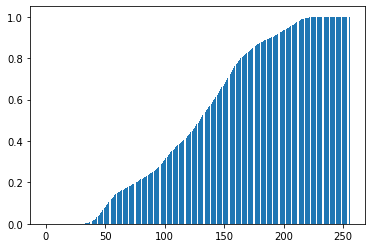

In [31]:
accInHistogram =np.zeros(256,dtype=float)
 
for i in range(255):
  accInHistogram[i+1] =accInHistogram[i]+inHistogram[i]
plt.bar(range(256),accInHistogram)

In [32]:
T =np.zeros(256,dtype=int)
for i in range(len(accInHistogram)):
  T[i] = int(255*accInHistogram[i])

array([0.        , 0.014375  , 0.01501709, 0.01544678, 0.01588867,
       0.01641357, 0.0169043 , 0.01757813, 0.01840088, 0.01929932,
       0.02053467, 0.02266113, 0.02569092, 0.03050293, 0.03765625,
       0.04810791, 0.062229  , 0.07949463, 0.09790527, 0.11615234,
       0.13332275, 0.15032715, 0.16698486, 0.18285889, 0.19737305,
       0.2107251 , 0.22223389, 0.23242432, 0.24196289, 0.25091797,
       0.25939697, 0.26755859, 0.27529053, 0.28260986, 0.28986328,
       0.2962915 , 0.30251465, 0.30858154, 0.31438965, 0.31966553,
       0.32460205, 0.32950439, 0.33393311, 0.33789063, 0.34135254,
       0.34458984, 0.34764893, 0.35060303, 0.35342285, 0.35583008,
       0.35824707, 0.36036865, 0.36238525, 0.36450439, 0.36667969,
       0.36904785, 0.37171631, 0.3747583 , 0.37770996, 0.38019775,
       0.38220459, 0.38371338, 0.38490234, 0.38578125, 0.38658691,
       0.38734375, 0.38793945, 0.38860107, 0.38924561, 0.38984863,
       0.39042969, 0.3910498 , 0.39162842, 0.39223389, 0.39283

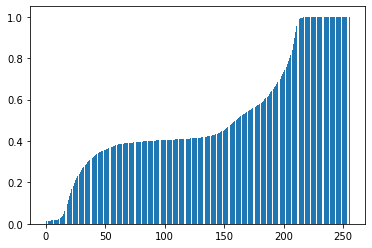

In [33]:
accTarHistogram =np.zeros(256,dtype=float)
 
for i in range(255):
  accTarHistogram[i+1] =accTarHistogram[i]+tarHistogram[i]
plt.bar(range(256),accTarHistogram)
accTarHistogram

In [34]:
G =np.zeros(256,dtype=int)
for i in range(len(accTarHistogram)):
  G[i] =np.round(255*accTarHistogram[i])
G

array([  0,   4,   4,   4,   4,   4,   4,   4,   5,   5,   5,   6,   7,
         8,  10,  12,  16,  20,  25,  30,  34,  38,  43,  47,  50,  54,
        57,  59,  62,  64,  66,  68,  70,  72,  74,  76,  77,  79,  80,
        82,  83,  84,  85,  86,  87,  88,  89,  89,  90,  91,  91,  92,
        92,  93,  94,  94,  95,  96,  96,  97,  97,  98,  98,  98,  99,
        99,  99,  99,  99,  99, 100, 100, 100, 100, 100, 100, 100, 101,
       101, 101, 101, 101, 101, 102, 102, 102, 102, 102, 102, 102, 102,
       102, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103,
       103, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 105,
       105, 105, 105, 105, 105, 105, 105, 105, 106, 106, 106, 106, 106,
       106, 106, 107, 107, 107, 107, 108, 108, 108, 108, 109, 109, 110,
       110, 111, 112, 112, 113, 114, 115, 116, 116, 118, 119, 120, 121,
       123, 124, 125, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 140, 141, 142, 143, 144, 145, 146, 147, 14

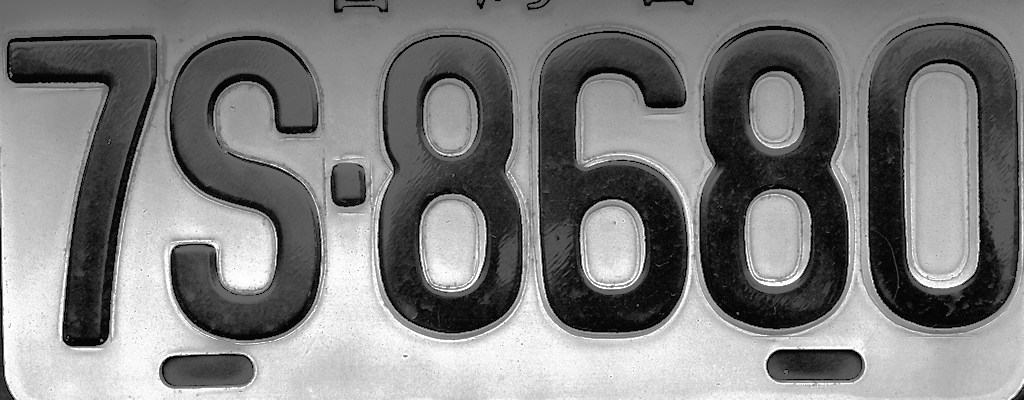

In [35]:
testOut =np.zeros(tarImage.shape,dtype=np.uint8)
 
for row in range(tarImage.shape[0]):
  for col in range(tarImage.shape[1]):
    gValue =tarImage[row][col]
    testOut[row][col] =G[gValue]
 
colab.cv2_imshow(testOut)

[  0   4   4   4   4   4   4   4   5   5   5   6   7   8  10  12  16  20
  25  30  34  38  43  47  50  54  57  59  62  64  66  68  70  72  74  76
  77  79  80  82  83  84  85  86  87  88  89  89  90  91  91  92  92  93
  94  94  95  96  96  97  97  98  98  98  99  99  99  99  99  99 100 100
 100 100 100 100 100 101 101 101 101 101 101 102 102 102 102 102 102 102
 102 102 103 103 103 103 103 103 103 103 103 103 103 103 103 104 104 104
 104 104 104 104 104 104 104 104 105 105 105 105 105 105 105 105 105 106
 106 106 106 106 106 106 107 107 107 107 108 108 108 108 109 109 110 110
 111 112 112 113 114 115 116 116 118 119 120 121 123 124 125 127 128 129
 130 132 133 134 135 136 137 138 139 140 140 141 142 143 144 145 146 147
 148 149 150 152 153 155 156 158 160 162 164 166 168 170 172 175 177 179
 181 184 187 190 193 196 200 204 208 214 221 229 236 244 249 252 253 254
 254 254 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

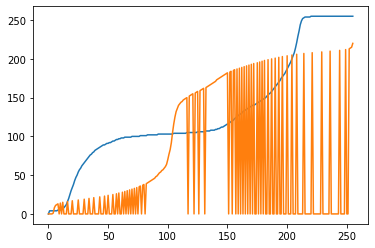

In [43]:
iG =np.zeros(256,dtype =int)

for x_inv in range(256):
  for x in range(256):
    if x_inv ==G[x]:
      iG[x_inv] =x
      break
    # if x_inv ==G[x]:
    #   iGnf[x_inv] =x
    #   break
    # elif x_inv<=G[x]:
    #   iGf[x_inv] =x
# print(G)
plt.plot(np.arange(256),G)
plt.plot(np.arange(256),iG)
# plt.plot(np.arange(256),iGa,'o')
# print(np.arange(256))
print(G)
print(iG)

In [37]:
Z =np.zeros(256,dtype =int)
 
for x in range(256):
  y =T[x]
  Z[x] = iG[y]
 
print(Z)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   1   1   1   1   1   8  11  12  14  15  15  16  16  17  17  18  18  19
  19  19  20  20  20  21  21  21  22  22  22  22  22  22  23  23  23  23
  23  24  24  24  25  25  25  25  25  26  26  26  27  27  28  28  28  29
  29  30  30  31  31  32  33  34  35  35  37  38  39  41  43  44  46  49
  51  54  56  57  61  64  70  83  92 105 125 132 140 142 145 148 150 152
 154 156 157 159 161 163 164 167 169 171 173 175 177 179 181 183 185 186
 187 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 203 204
 204 205 205 206 206 206 206 207 207 207 207 207 208 208 208 208 208 208
 209 209 209 209 209 209 209 209 209 209 209 210 210 210 210 210 210 210
 210 211 211 211 211 211 211 211 211 211 212 212 212 212 212 213 213 213
 213 213 214 214 214 214 215 215 215 215 215 215 215 215 215 215 215 215
 215 215 215 215 215 215 215 215 215 215 215 215 22

(512, 512)
(512, 512)


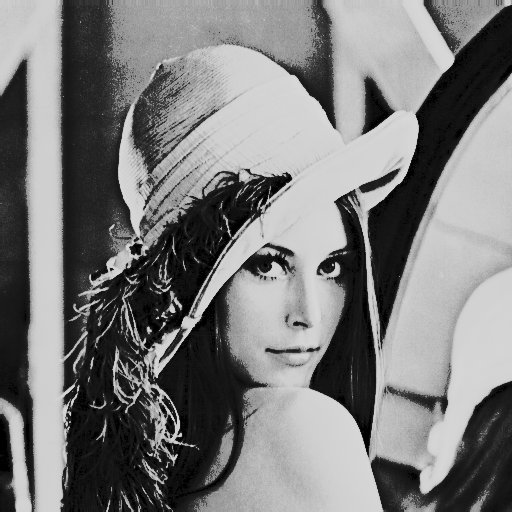

In [38]:
outImage =np.zeros(inImage.shape,dtype =np.uint8)
print(np.shape(inImage))
print(np.shape(outImage))
for row in range(outImage.shape[0]):
  for col in range(outImage.shape[1]):
    gValue =inImage[row][col]
    outValue =Z[gValue]
    outImage[row][col] =outValue
 
colab.cv2_imshow(outImage)

(512, 512)
(256, 1)
(256,)


<BarContainer object of 256 artists>

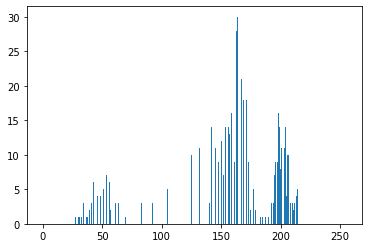

In [39]:
print(outImage.shape)
outHist =cv2.calcHist(outImage,[0],None,[256],[0,256])
print(outHist.shape)
outHist =outHist.reshape(256)
print(outHist.shape)
plt.bar(range(outHist.shape[0]),outHist)